In [2]:
# Part 1: Data Import and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('Housing.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

Dataset loaded successfully!
Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:
<class 'pandas.

In [3]:
# Part 2: Data Cleaning and Feature Engineering

# Create a copy for preprocessing
df_processed = df.copy()

# Handle column names (make them lowercase and consistent)
df_processed.columns = df_processed.columns.str.lower().str.replace(' ', '')

print("Column names after cleaning:")
print(list(df_processed.columns))

# Convert categorical variables to numerical
label_encoders = {}

# Binary categorical columns (Yes/No)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']

for col in binary_cols:
    if col in df_processed.columns:
        # Convert Yes/No to 1/0
        df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})
        print(f"Converted {col}: {df_processed[col].unique()}")

# Handle furnishing status (ordinal encoding)
if 'furnishingstatus' in df_processed.columns:
    furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
    df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map(furnishing_map)
    print(f"Converted furnishingstatus: {df_processed['furnishingstatus'].unique()}")

# Check for any remaining missing values after encoding
print("\nMissing values after encoding:")
print(df_processed.isnull().sum())

# Display processed dataset info
print("\nProcessed dataset info:")
print(df_processed.info())
print("\nProcessed dataset sample:")
print(df_processed.head())

Column names after cleaning:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Converted mainroad: [1 0]
Converted guestroom: [0 1]
Converted basement: [0 1]
Converted hotwaterheating: [0 1]
Converted airconditioning: [1 0]
Converted prefarea: [1 0]
Converted furnishingstatus: [2 1 0]

Missing values after encoding:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    in

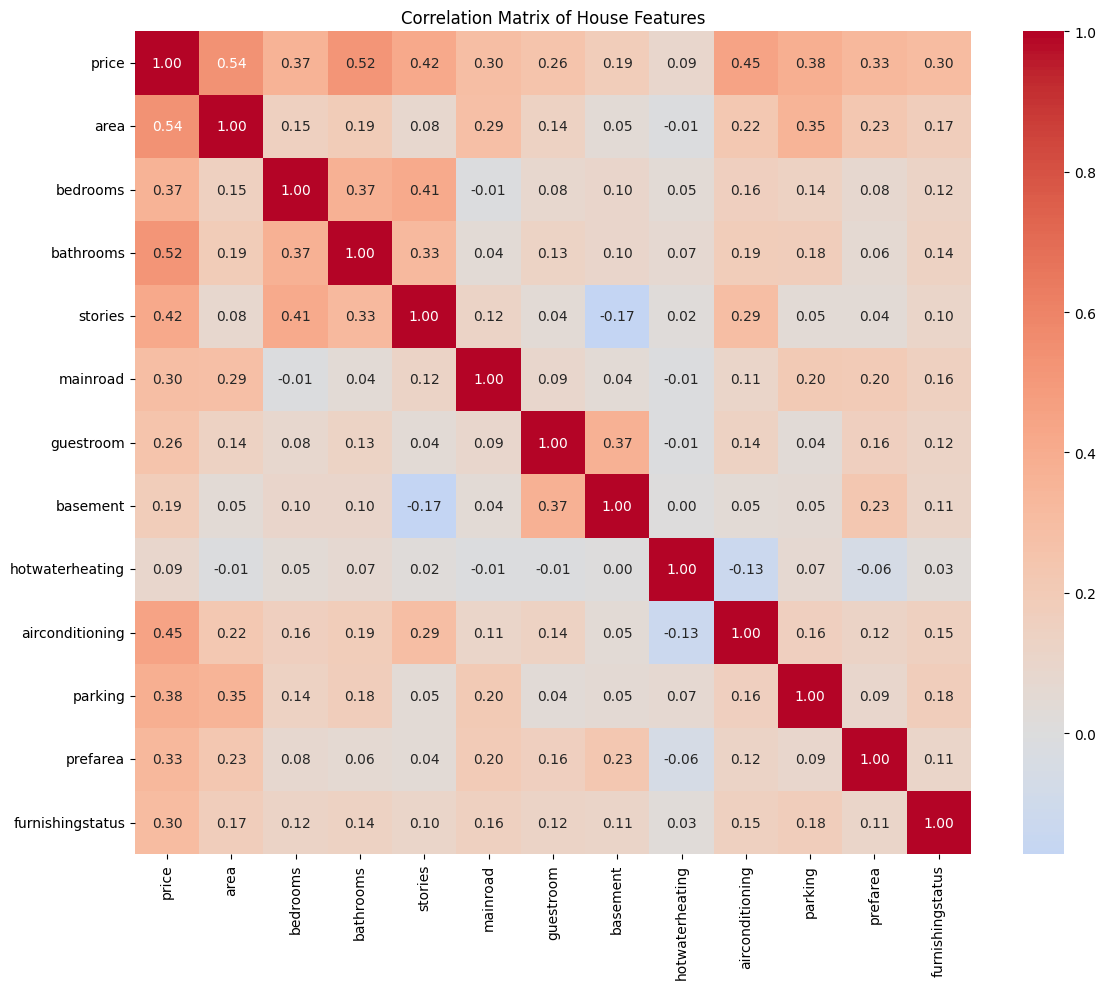

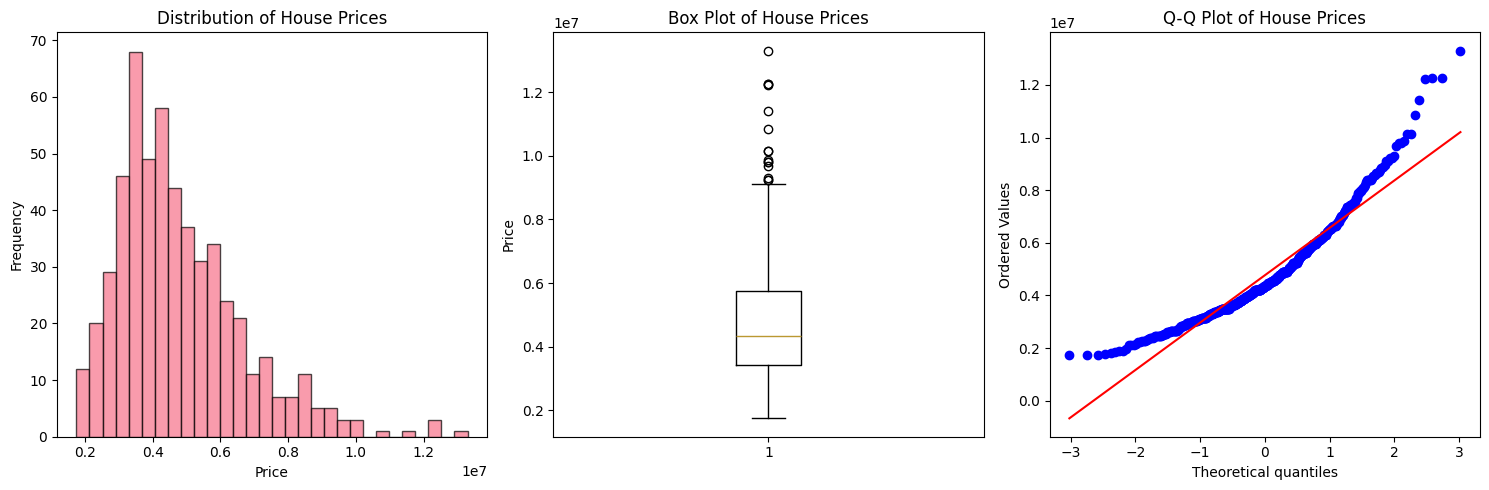

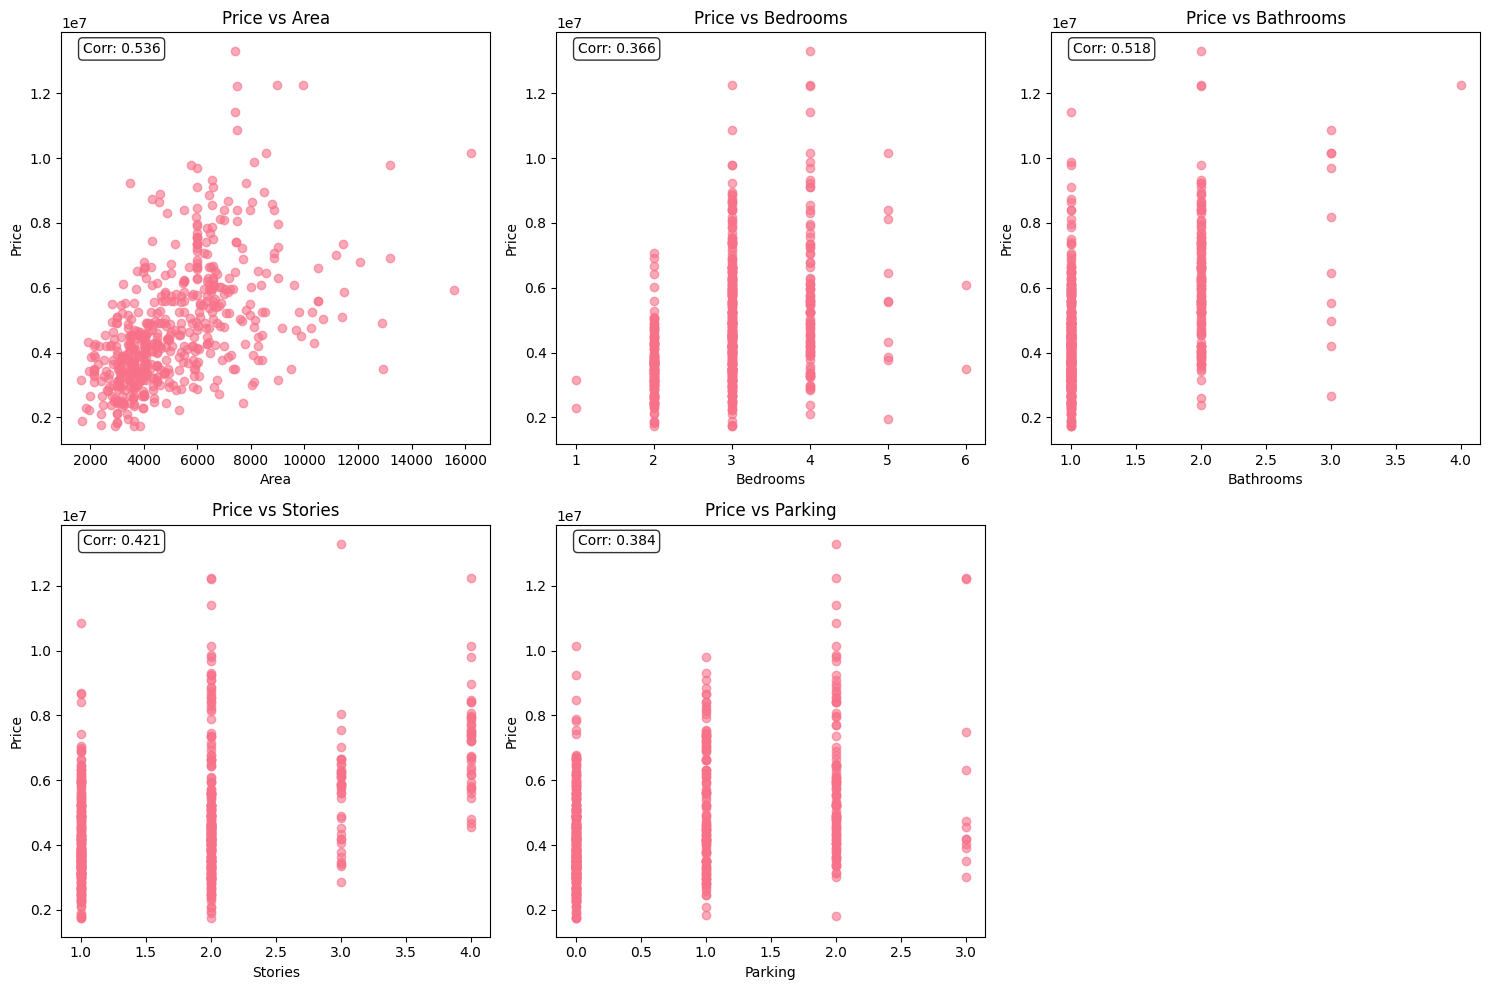

Features ranked by correlation with price:
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


In [4]:
# Part 3: Exploratory Data Analysis

# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of House Features')
plt.tight_layout()
plt.show()

# Distribution of target variable (Price)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_processed['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df_processed['price'])
plt.title('Box Plot of House Prices')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(df_processed['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of House Prices')

plt.tight_layout()
plt.show()

# Scatter plots for key numerical features vs Price
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    if feature in df_processed.columns:
        plt.subplot(2, 3, i)
        plt.scatter(df_processed[feature], df_processed['price'], alpha=0.6)
        plt.xlabel(feature.title())
        plt.ylabel('Price')
        plt.title(f'Price vs {feature.title()}')
        
        # Add correlation coefficient
        corr = df_processed[feature].corr(df_processed['price'])
        plt.text(0.05, 0.95, f'Corr: {corr:.3f}', transform=plt.gca().transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Feature importance based on correlation with price
feature_corr = df_processed.corr()['price'].abs().sort_values(ascending=False)
print("Features ranked by correlation with price:")
print(feature_corr[1:])  # Exclude price itself

In [5]:
# Part 4: Simple Linear Regression (Price vs Area)

# Select the most correlated feature for simple linear regression
# Based on EDA, 'area' is typically the most correlated with price
X_simple = df_processed[['area']]  # Feature (2D array for sklearn)
y = df_processed['price']          # Target variable

print(f"Feature selected for Simple Linear Regression: Area")
print(f"Correlation between Area and Price: {df_processed['area'].corr(df_processed['price']):.3f}")

# Split the data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_simple.shape[0]}")
print(f"Test set size: {X_test_simple.shape[0]}")

# Create and fit the simple linear regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Make predictions
y_pred_train_simple = simple_lr.predict(X_train_simple)
y_pred_test_simple = simple_lr.predict(X_test_simple)

# Calculate evaluation metrics
train_mae_simple = mean_absolute_error(y_train, y_pred_train_simple)
test_mae_simple = mean_absolute_error(y_test, y_pred_test_simple)
train_mse_simple = mean_squared_error(y_train, y_pred_train_simple)
test_mse_simple = mean_squared_error(y_test, y_pred_test_simple)
train_r2_simple = r2_score(y_train, y_pred_train_simple)
test_r2_simple = r2_score(y_test, y_pred_test_simple)

print("\n" + "="*50)
print("SIMPLE LINEAR REGRESSION RESULTS")
print("="*50)
print(f"Model Coefficients:")
print(f"  Intercept: {simple_lr.intercept_:,.2f}")
print(f"  Slope (Area): {simple_lr.coef_[0]:.2f}")
print(f"\nModel Equation: Price = {simple_lr.intercept_:,.2f} + {simple_lr.coef_[0]:.2f} × Area")

print(f"\nTraining Set Metrics:")
print(f"  MAE: {train_mae_simple:,.2f}")
print(f"  MSE: {train_mse_simple:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse_simple):,.2f}")
print(f"  R²: {train_r2_simple:.4f}")

print(f"\nTest Set Metrics:")
print(f"  MAE: {test_mae_simple:,.2f}")
print(f"  MSE: {test_mse_simple:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse_simple):,.2f}")
print(f"  R²: {test_r2_simple:.4f}")

# Interpretation
print(f"\nModel Interpretation:")
print(f"  - For every 1 sq ft increase in area, price increases by ${simple_lr.coef_[0]:,.2f}")
print(f"  - The model explains {test_r2_simple*100:.1f}% of the variance in house prices")

Feature selected for Simple Linear Regression: Area
Correlation between Area and Price: 0.536

Training set size: 436
Test set size: 109

SIMPLE LINEAR REGRESSION RESULTS
Model Coefficients:
  Intercept: 2,512,254.26
  Slope (Area): 425.73

Model Equation: Price = 2,512,254.26 + 425.73 × Area

Training Set Metrics:
  MAE: 1,092,585.59
  MSE: 2,204,738,681,379.34
  RMSE: 1,484,836.25
  R²: 0.2850

Test Set Metrics:
  MAE: 1,474,748.13
  MSE: 3,675,286,604,768.19
  RMSE: 1,917,103.70
  R²: 0.2729

Model Interpretation:
  - For every 1 sq ft increase in area, price increases by $425.73
  - The model explains 27.3% of the variance in house prices


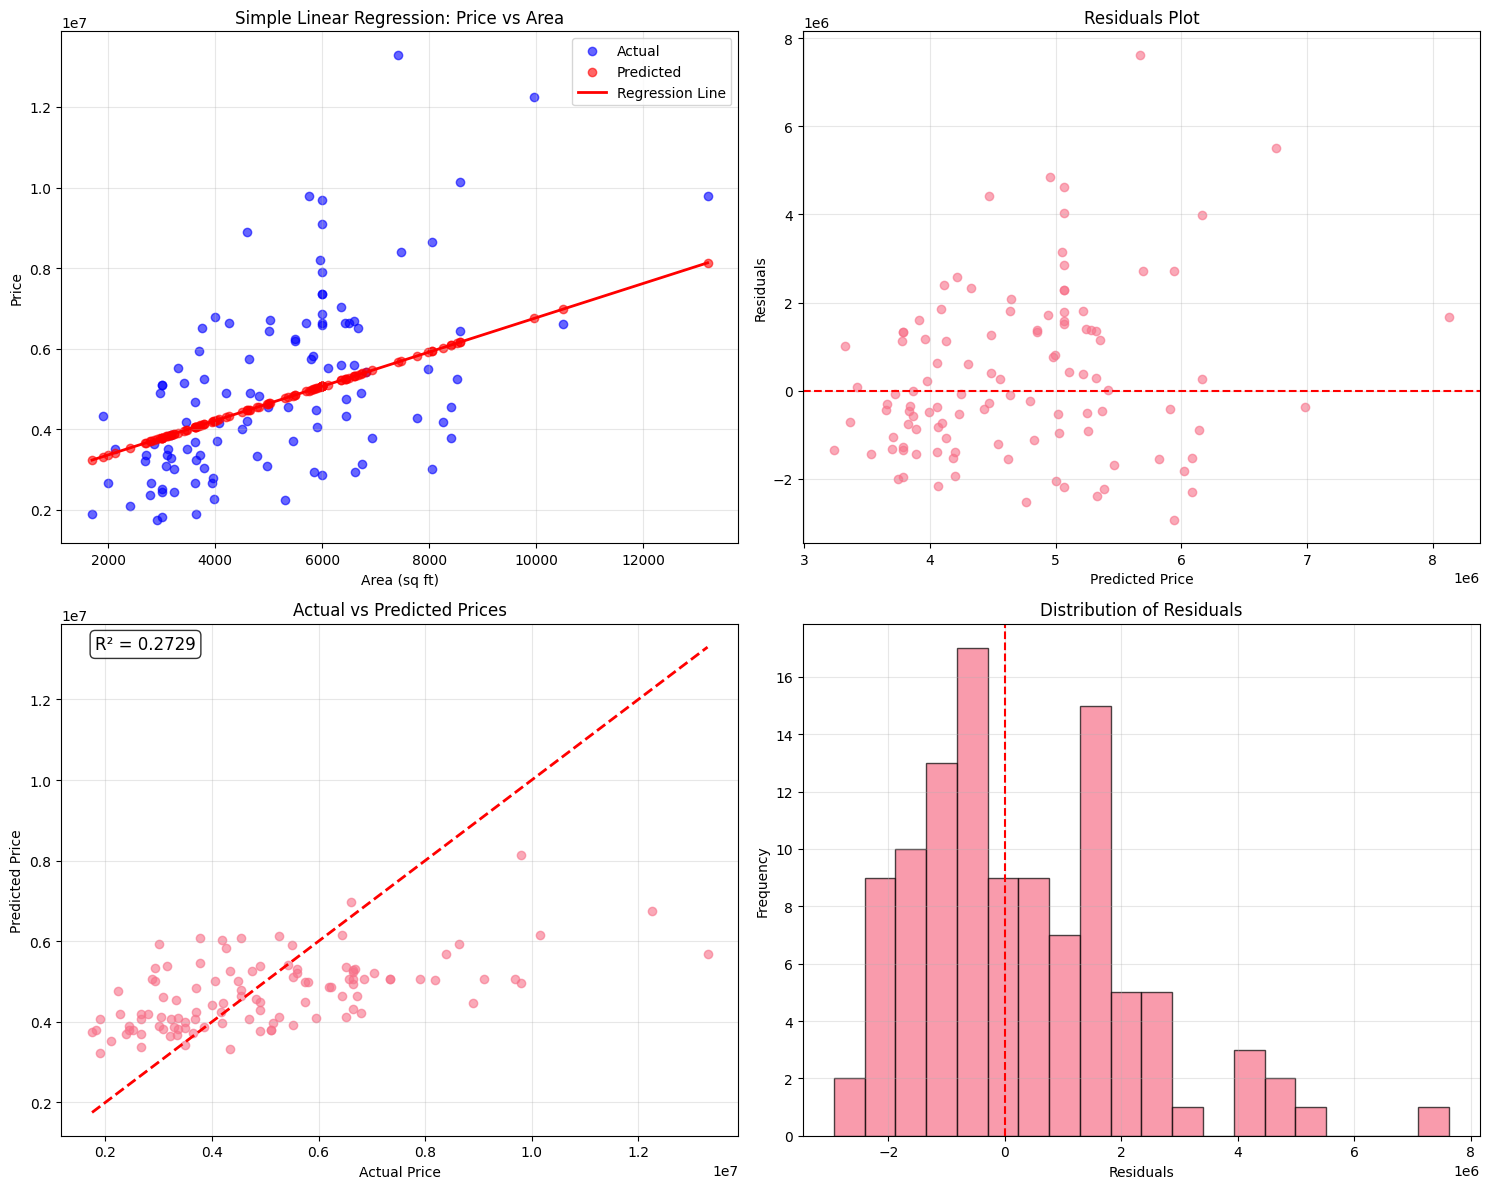


Sample Predictions (First 10 test samples):
------------------------------------------------------------
Area (sq ft) Actual Price    Predicted Price    Error       
------------------------------------------------------------
5900         $4,060,000      $5,024,060         $964,060    
6500         $6,650,000      $5,279,498         $1,370,502  
4040         $3,710,000      $4,232,203         $522,203    
5000         $6,440,000      $4,640,903         $1,799,097  
3960         $2,800,000      $4,198,144         $1,398,144  
6720         $4,900,000      $5,373,159         $473,159    
8520         $5,250,000      $6,139,473         $889,473    
4990         $4,543,000      $4,636,646         $93,646     
3240         $2,450,000      $3,891,619         $1,441,619  
2700         $3,353,000      $3,661,725         $308,725    


In [8]:
# Part 5: Simple Linear Regression Visualization

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with regression line
axes[0, 0].scatter(X_test_simple, y_test, alpha=0.6, color='blue', label='Actual')
axes[0, 0].scatter(X_test_simple, y_pred_test_simple, alpha=0.6, color='red', label='Predicted')

# Sort values for smooth line
sorted_indices = np.argsort(X_test_simple.iloc[:, 0])
axes[0, 0].plot(X_test_simple.iloc[sorted_indices, 0], y_pred_test_simple[sorted_indices], 
                color='red', linewidth=2, label='Regression Line')

axes[0, 0].set_xlabel('Area (sq ft)')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Simple Linear Regression: Price vs Area')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals_simple = y_test - y_pred_test_simple
axes[0, 1].scatter(y_pred_test_simple, residuals_simple, alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Actual vs Predicted
axes[1, 0].scatter(y_test, y_pred_test_simple, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title('Actual vs Predicted Prices')
axes[1, 0].grid(True, alpha=0.3)

# Add R² value
axes[1, 0].text(0.05, 0.95, f'R² = {test_r2_simple:.4f}', 
                transform=axes[1, 0].transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Distribution of residuals
axes[1, 1].hist(residuals_simple, bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].axvline(x=0, color='red', linestyle='--')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print sample predictions
print("\nSample Predictions (First 10 test samples):")
print("-" * 60)
print(f"{'Area (sq ft)':<12} {'Actual Price':<15} {'Predicted Price':<18} {'Error':<12}")
print("-" * 60)

for i in range(min(10, len(X_test_simple))):
    area = X_test_simple.iloc[i, 0]
    actual = y_test.iloc[i]
    predicted = y_pred_test_simple[i]
    error = abs(actual - predicted)
    print(f"{area:<12.0f} ${actual:<14,.0f} ${predicted:<17,.0f} ${error:<11,.0f}")

In [9]:
# Part 6: Multiple Linear Regression

# Select all features except price for multiple regression
feature_columns = [col for col in df_processed.columns if col != 'price']
X_multiple = df_processed[feature_columns]
y = df_processed['price']

print("Features selected for Multiple Linear Regression:")
print(feature_columns)
print(f"\nNumber of features: {len(feature_columns)}")

# Split the data
X_train_multiple, X_test_multiple, y_train_mult, y_test_mult = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train_multiple.shape}")
print(f"Test set shape: {X_test_multiple.shape}")

# Create and fit the multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_multiple, y_train_mult)

# Make predictions
y_pred_train_mult = multiple_lr.predict(X_train_multiple)
y_pred_test_mult = multiple_lr.predict(X_test_multiple)

# Calculate evaluation metrics
train_mae_mult = mean_absolute_error(y_train_mult, y_pred_train_mult)
test_mae_mult = mean_absolute_error(y_test_mult, y_pred_test_mult)
train_mse_mult = mean_squared_error(y_train_mult, y_pred_train_mult)
test_mse_mult = mean_squared_error(y_test_mult, y_pred_test_mult)
train_r2_mult = r2_score(y_train_mult, y_pred_train_mult)
test_r2_mult = r2_score(y_test_mult, y_pred_test_mult)

print("\n" + "="*60)
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*60)

print(f"Model Coefficients:")
print(f"  Intercept: ${multiple_lr.intercept_:,.2f}")
print(f"  Feature Coefficients:")
for feature, coef in zip(feature_columns, multiple_lr.coef_):
    print(f"    {feature}: {coef:,.2f}")

print(f"\nTraining Set Metrics:")
print(f"  MAE: ${train_mae_mult:,.2f}")
print(f"  MSE: ${train_mse_mult:,.2f}")
print(f"  RMSE: ${np.sqrt(train_mse_mult):,.2f}")
print(f"  R²: {train_r2_mult:.4f}")

print(f"\nTest Set Metrics:")
print(f"  MAE: ${test_mae_mult:,.2f}")
print(f"  MSE: ${test_mse_mult:,.2f}")
print(f"  RMSE: ${np.sqrt(test_mse_mult):,.2f}")
print(f"  R²: {test_r2_mult:.4f}")

# Feature importance based on absolute coefficient values
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': multiple_lr.coef_,
    'abs_coefficient': np.abs(multiple_lr.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(f"\nFeature Importance (by absolute coefficient value):")
print(feature_importance)

Features selected for Multiple Linear Regression:
['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Number of features: 12

Training set shape: (436, 12)
Test set shape: (109, 12)

MULTIPLE LINEAR REGRESSION RESULTS
Model Coefficients:
  Intercept: $-127,711.17
  Feature Coefficients:
    area: 235.85
    bedrooms: 78,574.49
    bathrooms: 1,097,117.27
    stories: 406,223.16
    mainroad: 366,824.19
    guestroom: 233,146.77
    basement: 393,159.78
    hotwaterheating: 687,881.31
    airconditioning: 785,550.58
    parking: 225,756.51
    prefarea: 629,901.66
    furnishingstatus: 210,397.12

Training Set Metrics:
  MAE: $718,146.60
  MSE: $969,902,818,698.31
  RMSE: $984,836.44
  R²: 0.6854

Test Set Metrics:
  MAE: $979,679.69
  MSE: $1,771,751,116,594.03
  RMSE: $1,331,071.42
  R²: 0.6495

Feature Importance (by absolute coefficient value):
             feature   coeff

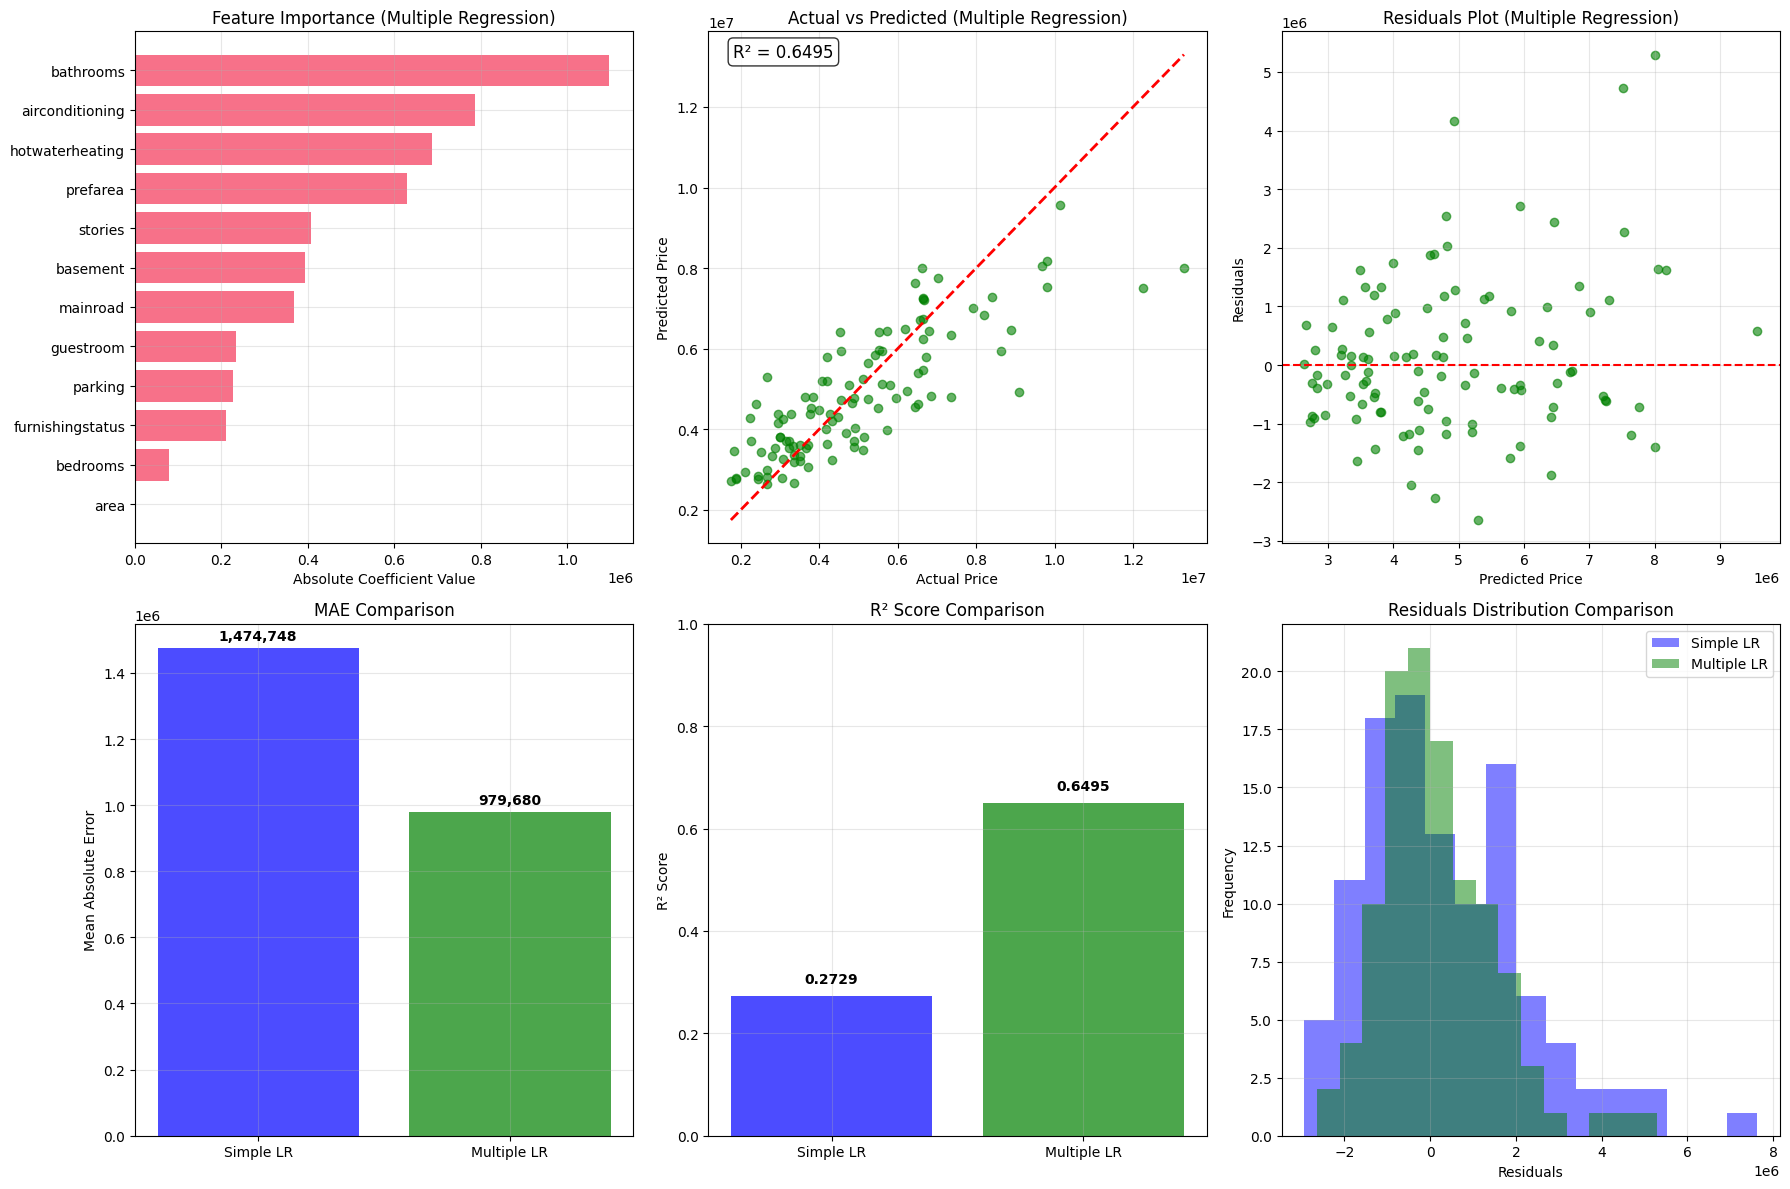

COMPREHENSIVE MODEL COMPARISON
            Metric Simple Linear Regression Multiple Linear Regression
               MAE            $1,474,748.13                $979,679.69
               MSE    $3,675,286,604,768.19      $1,771,751,116,594.03
              RMSE            $1,917,103.70              $1,331,071.42
                R²                   0.2729                     0.6495
Number of Features                        1                         12


MODEL INTERPRETATION

Simple Linear Regression Insights:
  • Uses only Area as predictor
  • Explains 27.3% of price variance
  • Each additional sq ft increases price by $425.73

Multiple Linear Regression Insights:
  • Uses 12 features as predictors
  • Explains 64.9% of price variance
  • Improvement in R²: 37.7 percentage points

Top 3 Most Important Features (Multiple Regression):
  • bathrooms: increases price by $1,097,117.27 per unit
  • airconditioning: increases price by $785,550.58 per unit
  • hotwaterheating: increases pri

In [12]:
# Part 7: Multiple Linear Regression Visualization and Model Comparison

# Create comprehensive visualization for multiple regression
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Feature Importance Plot
feature_importance_sorted = feature_importance.sort_values('abs_coefficient', ascending=True)
axes[0, 0].barh(feature_importance_sorted['feature'], feature_importance_sorted['abs_coefficient'])
axes[0, 0].set_xlabel('Absolute Coefficient Value')
axes[0, 0].set_title('Feature Importance (Multiple Regression)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Multiple Regression)
axes[0, 1].scatter(y_test_mult, y_pred_test_mult, alpha=0.6, color='green')
axes[0, 1].plot([y_test_mult.min(), y_test_mult.max()], 
                [y_test_mult.min(), y_test_mult.max()], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title('Actual vs Predicted (Multiple Regression)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.05, 0.95, f'R² = {test_r2_mult:.4f}', 
                transform=axes[0, 1].transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. Residuals Plot (Multiple Regression)
residuals_mult = y_test_mult - y_pred_test_mult
axes[0, 2].scatter(y_pred_test_mult, residuals_mult, alpha=0.6, color='green')
axes[0, 2].axhline(y=0, color='red', linestyle='--')
axes[0, 2].set_xlabel('Predicted Price')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Residuals Plot (Multiple Regression)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Model Comparison
models = ['Simple LR', 'Multiple LR']
mae_scores = [test_mae_simple, test_mae_mult]
r2_scores = [test_r2_simple, test_r2_mult]

axes[1, 0].bar(models, mae_scores, color=['blue', 'green'], alpha=0.7)
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].grid(True, alpha=0.3)

# Add values on bars
for i, v in enumerate(mae_scores):
    axes[1, 0].text(i, v + max(mae_scores)*0.01, f'{v:,.0f}', 
                    ha='center', va='bottom', fontweight='bold')

# 5. R² Score Comparison
axes[1, 1].bar(models, r2_scores, color=['blue', 'green'], alpha=0.7)
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('R² Score Comparison')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, alpha=0.3)

# Add values on bars
for i, v in enumerate(r2_scores):
    axes[1, 1].text(i, v + 0.02, f'{v:.4f}', 
                    ha='center', va='bottom', fontweight='bold')

# 6. Residuals Distribution Comparison
axes[1, 2].hist(residuals_simple, bins=15, alpha=0.5, label='Simple LR', color='blue')
axes[1, 2].hist(residuals_mult, bins=15, alpha=0.5, label='Multiple LR', color='green')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Residuals Distribution Comparison')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comprehensive Model Comparison Table

print("COMPREHENSIVE MODEL COMPARISON")


comparison_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'Number of Features'],
    'Simple Linear Regression': [
        f'${test_mae_simple:,.2f}',
        f'${test_mse_simple:,.2f}',
        f'${np.sqrt(test_mse_simple):,.2f}',
        f'{test_r2_simple:.4f}',
        '1'
    ],
    'Multiple Linear Regression': [
        f'${test_mae_mult:,.2f}',
        f'${test_mse_mult:,.2f}',
        f'${np.sqrt(test_mse_mult):,.2f}',
        f'{test_r2_mult:.4f}',
        f'{len(feature_columns)}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Model Interpretation

print("\n\nMODEL INTERPRETATION")


print(f"\nSimple Linear Regression Insights:")
print(f"  • Uses only Area as predictor")
print(f"  • Explains {test_r2_simple*100:.1f}% of price variance")
print(f"  • Each additional sq ft increases price by ${simple_lr.coef_[0]:,.2f}")

print(f"\nMultiple Linear Regression Insights:")
print(f"  • Uses {len(feature_columns)} features as predictors")
print(f"  • Explains {test_r2_mult*100:.1f}% of price variance")
print(f"  • Improvement in R²: {(test_r2_mult - test_r2_simple)*100:.1f} percentage points")

print(f"\nTop 3 Most Important Features (Multiple Regression):")
for i, row in feature_importance.head(3).iterrows():
    effect = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"  • {row['feature']}: {effect} price by ${abs(row['coefficient']):,.2f} per unit")

# Recommendation
improvement = ((test_mae_simple - test_mae_mult) / test_mae_simple) * 100
print(f"\nRecommendation:")
if test_r2_mult > test_r2_simple:
    print(f"  • Multiple Linear Regression performs better")
    print(f"  • {improvement:.1f}% reduction in MAE compared to simple regression")
    print(f"  • Use multiple regression for better predictions")
else:
    print(f"  • Simple Linear Regression might be sufficient")
    print(f"  • Consider the trade-off between complexity and performance")